In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
# decays = pd.read_csv('models/decays.csv', names=['decays'])

In [265]:
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
rewards_opp = pd.read_csv('rewards_opp.csv', names=['reward'])

In [266]:
metrics.shape, winrates.shape

((1858, 7), (93, 3))

In [267]:
metrics.tail()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
1853,1853,1,0.000005,0.000005,0.000016,0.000016,-0.000612
1854,1854,1,0.000004,0.000004,0.000012,0.000012,-0.000756
1855,1855,1,0.000004,0.000004,0.000003,0.000003,-0.000678
1856,1856,1,0.000005,0.000005,0.000005,0.000005,-0.000698
1857,1857,1,0.000005,0.000005,0.000028,0.000028,-0.000942


In [268]:
winrates.tail() 

,episode,vs_random,vs_fixed
88,1760,80.0,0.0
89,1780,90.0,0.0
90,1800,50.0,0.0
91,1820,60.0,0.0
92,1840,80.0,0.0


In [269]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_opp_no_dubs = rewards_opp.drop_duplicates()
rewards_rl.shape, rewards_opp.shape, rewards_rl_no_dubs.shape, rewards_opp_no_dubs.shape

((191, 1), (102, 1), (2, 1), (2, 1))

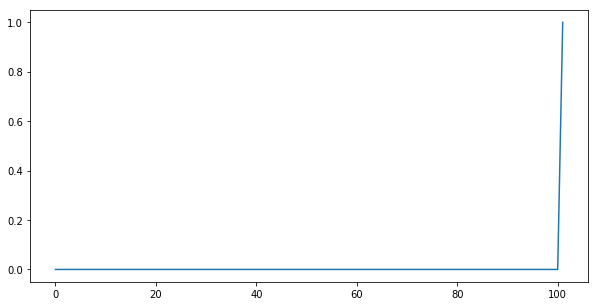

In [270]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp.index, rewards_opp.reward)
plt.show()

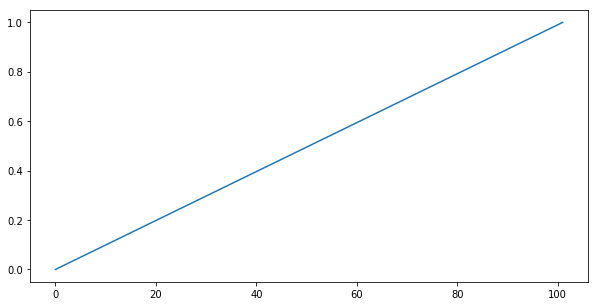

In [271]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp_no_dubs.index, rewards_opp_no_dubs.reward)
plt.show()

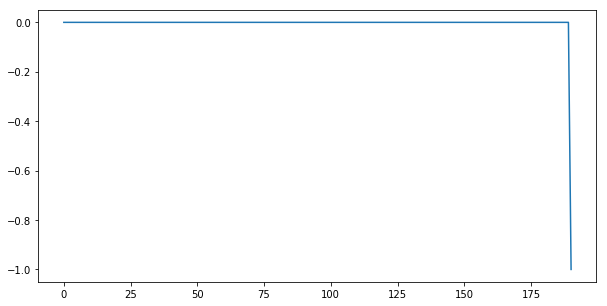

In [272]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

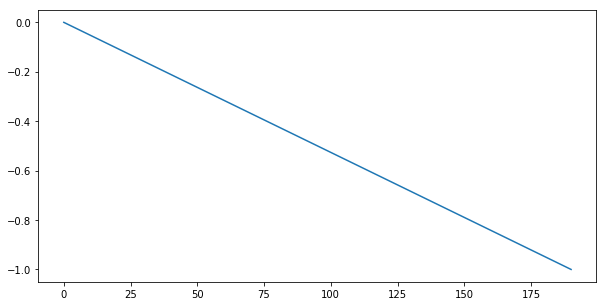

In [273]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

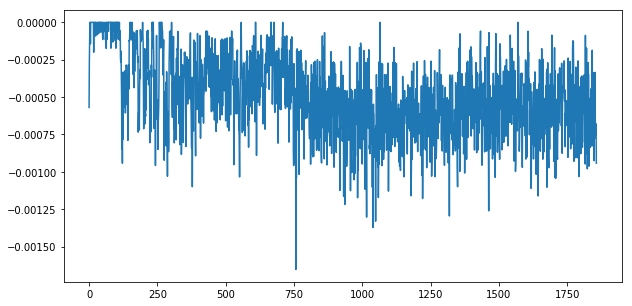

In [274]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.reward_avg)
plt.show()

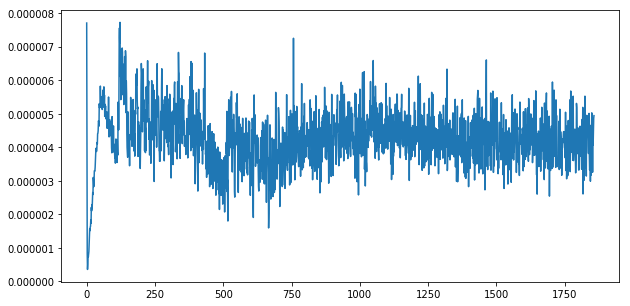

In [275]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

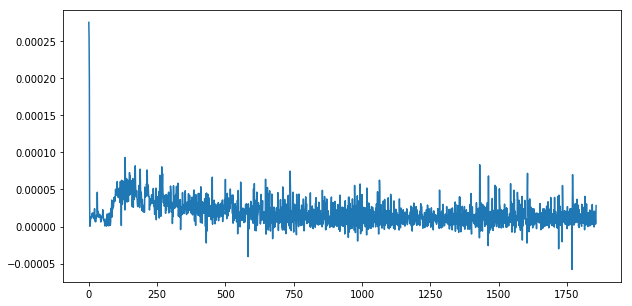

In [276]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

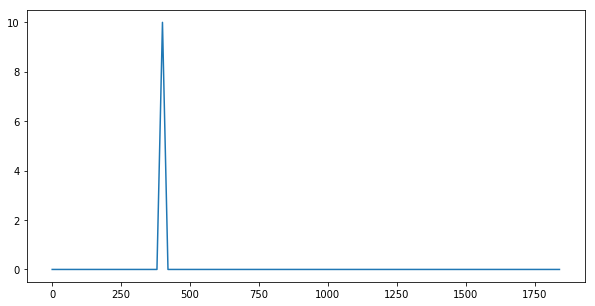

In [277]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

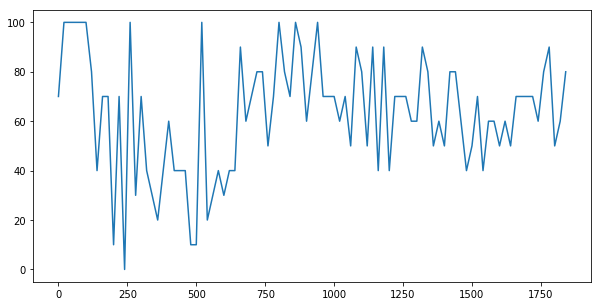

In [278]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_random)
plt.show()

In [279]:
winrates[winrates.vs_fixed == winrates.vs_fixed.max()]

,episode,vs_random,vs_fixed
20,400,60.0,10.0


In [280]:
roll = np.random.choice(np.arange(1, 7), 2)
roll

array([6, 3])

In [53]:
roll

array([6, 1])

In [118]:
rolls = np.array([np.random.choice(np.arange(1, 7), 2) for _ in range(10000)])
with open('rolls.npy', 'wb') as f:
    np.save(f, rolls)

In [111]:
with open('rolls.npy', 'rb') as f:
    rolls1 = np.load(f)

In [119]:
rolls

array([[6, 3],
       [1, 6],
       [1, 6],
       ...,
       [6, 6],
       [6, 3],
       [4, 5]])

In [107]:
rolls1

array([[6, 2],
       [4, 2],
       [2, 1],
       ...,
       [5, 5],
       [5, 4],
       [2, 3]])

In [117]:
rolls1

[]

In [116]:
rolls1 = list(rolls1)
for i in range(5000):
    roll = rolls1[0]
    del rolls1[0]
    print(roll)

[6 2]
[4 2]
[2 1]
[6 5]
[1 5]
[1 3]
[6 1]
[3 1]
[1 5]
[1 5]
[6 3]
[4 2]
[1 6]
[2 3]
[6 3]
[4 3]
[2 4]
[3 5]
[4 3]
[4 6]
[5 3]
[3 4]
[4 6]
[2 1]
[4 3]
[1 2]
[4 5]
[3 6]
[5 4]
[5 4]
[4 3]
[2 2]
[5 4]
[3 1]
[6 6]
[5 5]
[6 1]
[4 6]
[6 3]
[5 1]
[6 5]
[2 2]
[6 2]
[6 2]
[1 1]
[4 1]
[2 6]
[2 4]
[1 5]
[1 6]
[6 5]
[6 1]
[6 3]
[5 6]
[3 1]
[4 1]
[4 3]
[2 4]
[4 5]
[1 4]
[6 3]
[6 2]
[6 3]
[4 5]
[6 1]
[6 4]
[1 3]
[6 1]
[3 2]
[4 3]
[3 4]
[3 4]
[2 1]
[1 6]
[1 2]
[3 4]
[3 5]
[4 4]
[6 5]
[3 6]
[3 6]
[3 2]
[1 4]
[6 3]
[5 2]
[3 3]
[5 1]
[3 4]
[6 6]
[6 6]
[5 4]
[3 4]
[6 5]
[1 2]
[5 6]
[6 2]
[4 5]
[1 6]
[3 5]
[2 1]
[5 2]
[6 1]
[1 5]
[5 2]
[3 4]
[2 4]
[6 4]
[5 4]
[1 3]
[2 5]
[6 6]
[3 3]
[5 5]
[5 3]
[5 3]
[4 2]
[1 5]
[6 4]
[5 5]
[5 1]
[4 2]
[2 4]
[5 6]
[4 5]
[2 4]
[5 3]
[1 5]
[1 3]
[2 1]
[1 6]
[6 2]
[5 6]
[3 6]
[1 3]
[5 3]
[3 2]
[2 3]
[4 3]
[4 6]
[2 3]
[1 6]
[5 6]
[3 2]
[5 2]
[3 1]
[1 4]
[3 4]
[3 6]
[6 1]
[4 5]
[6 1]
[6 4]
[6 1]
[4 5]
[3 6]
[3 6]
[6 2]
[3 6]
[2 1]
[5 4]
[3 3]
[2 1]
[6 4]
[1 2]
[4 5]
[5 5]
[6 2

[5 5]
[2 5]
[1 2]
[5 1]
[3 5]
[4 3]
[3 6]
[5 1]
[4 4]
[1 2]
[5 3]
[2 1]
[1 3]
[5 4]
[6 5]
[1 6]
[2 2]
[6 3]
[3 5]
[3 3]
[3 5]
[6 6]
[1 6]
[5 6]
[2 2]
[5 1]
[1 2]
[6 2]
[4 4]
[5 1]
[1 3]
[1 5]
[1 1]
[5 3]
[2 4]
[2 4]
[2 1]
[2 2]
[6 2]
[6 4]
[6 5]
[3 1]
[5 5]
[5 6]
[4 1]
[4 4]
[2 4]
[2 6]
[1 1]
[1 1]
[5 2]
[3 1]
[2 4]
[5 5]
[2 2]
[2 3]
[6 4]
[3 1]
[6 2]
[4 6]
[6 3]
[2 6]
[3 1]
[4 1]
[4 1]
[4 6]
[4 2]
[5 2]
[3 4]
[3 4]
[4 5]
[2 5]
[6 2]
[6 4]
[3 6]
[3 3]
[2 1]
[6 1]
[4 1]
[6 2]
[1 5]
[6 1]
[6 5]
[5 2]
[2 4]
[4 2]
[6 3]
[1 1]
[4 6]
[1 3]
[2 1]
[3 2]
[6 3]
[2 3]
[4 4]
[6 4]
[5 2]
[2 2]
[4 6]
[2 3]
[6 4]
[1 3]
[4 4]
[3 2]
[4 6]
[1 5]
[6 2]
[1 5]
[6 2]
[6 3]
[1 2]
[3 4]
[5 2]
[2 6]
[6 4]
[2 6]
[5 1]
[6 5]
[2 5]
[3 3]
[3 1]
[3 2]
[6 4]
[1 4]
[4 4]
[4 6]
[4 5]
[2 3]
[1 1]
[3 1]
[3 6]
[5 5]
[6 5]
[4 4]
[6 5]
[6 2]
[2 6]
[3 4]
[5 4]
[3 4]
[6 6]
[3 5]
[5 2]
[2 2]
[6 6]
[1 2]
[5 4]
[6 4]
[6 2]
[6 6]
[5 1]
[6 2]
[5 5]
[1 5]
[2 3]
[5 3]
[2 5]
[3 4]
[4 2]
[4 3]
[1 6]
[2 5]
[3 6]
[4 5]
[3 3]
[1 2]
[5 5

[3 3]
[2 4]
[6 5]
[3 3]
[5 5]
[1 2]
[5 2]
[4 2]
[3 4]
[4 5]
[2 2]
[1 5]
[5 1]
[1 2]
[1 3]
[5 4]
[3 4]
[2 2]
[3 4]
[3 4]
[6 3]
[4 5]
[2 2]
[4 5]
[6 4]
[1 6]
[2 5]
[1 2]
[4 1]
[1 6]
[2 1]
[1 5]
[2 1]
[5 2]
[3 6]
[3 2]
[5 5]
[4 4]
[3 1]
[6 5]
[3 4]
[5 2]
[3 2]
[4 1]
[3 4]
[4 2]
[3 5]
[6 5]
[6 2]
[3 6]
[6 2]
[3 3]
[4 5]
[6 4]
[6 3]
[3 4]
[2 6]
[2 1]
[1 2]
[4 2]
[1 2]
[6 2]
[4 5]
[2 2]
[6 5]
[5 3]
[1 5]
[5 2]
[4 3]
[6 5]
[3 1]
[3 5]
[3 6]
[6 2]
[3 6]
[4 1]
[2 3]
[1 6]
[5 5]
[4 5]
[3 5]
[3 3]
[3 2]
[1 6]
[1 1]
[3 1]
[5 6]
[4 6]
[2 4]
[6 5]
[1 6]
[1 6]
[2 3]
[6 6]
[2 3]
[6 2]
[6 4]
[1 1]
[4 3]
[2 1]
[2 1]
[4 6]
[4 6]
[6 4]
[1 2]
[6 3]
[4 3]
[4 3]
[6 2]
[1 4]
[3 5]
[3 6]
[5 6]
[4 5]
[4 4]
[5 3]
[3 3]
[6 2]
[4 4]
[1 3]
[6 3]
[2 6]
[2 2]
[2 3]
[5 4]
[1 4]
[6 3]
[2 2]
[5 2]
[4 1]
[4 2]
[6 1]
[2 6]
[2 1]
[1 4]
[4 4]
[5 2]
[2 6]
[6 1]
[5 3]
[6 3]
[4 6]
[5 3]
[1 3]
[3 3]
[4 1]
[3 4]
[5 6]
[6 4]
[6 1]
[6 6]
[2 5]
[3 5]
[4 5]
[5 1]
[3 5]
[6 3]
[5 4]
[1 5]
[1 6]
[1 2]
[5 2]
[6 3]
[1 1]
[2 2]
[4 5]
[1 3

[6 3]
[6 3]
[2 1]
[2 2]
[6 3]
[1 6]
[5 1]
[5 6]
[6 5]
[1 4]
[6 4]
[2 1]
[3 5]
[1 6]
[5 3]
[5 5]
[1 5]
[5 5]
[3 2]
[5 1]
[2 6]
[1 3]
[3 1]
[5 3]
[4 3]
[2 4]
[5 3]
[2 6]
[6 5]
[4 3]
[4 6]
[4 1]
[5 5]
[4 1]
[1 2]
[3 4]
[5 6]
[3 3]
[2 6]
[6 3]
[4 5]
[5 1]
[1 6]
[6 2]
[1 4]
[1 2]
[5 1]
[3 6]
[2 1]
[4 6]
[4 6]
[3 6]
[6 2]
[2 4]
[1 6]
[5 1]
[5 4]
[1 1]
[2 2]
[6 5]
[4 5]
[5 1]
[6 4]
[6 6]
[3 2]
[3 3]
[6 6]
[6 5]
[4 3]
[6 4]
[1 5]
[5 1]
[3 4]
[6 2]
[1 2]
[3 5]
[6 3]
[3 2]
[4 3]
[6 4]
[6 1]
[1 1]
[6 1]
[3 6]
[3 4]
[5 2]
[5 1]
[6 2]
[4 1]
[2 1]
[3 4]
[4 3]
[2 1]
[3 1]
[5 1]
[1 1]
[1 1]
[3 3]
[5 1]
[5 6]
[6 5]
[1 2]
[6 3]
[5 4]
[3 4]
[6 3]
[1 6]
[6 2]
[3 5]
[1 3]
[6 6]
[5 2]
[2 1]
[5 3]
[1 1]
[1 4]
[4 4]
[6 1]
[2 6]
[5 1]
[6 3]
[1 4]
[2 6]
[2 1]
[3 5]
[5 4]
[4 1]
[1 2]
[1 4]
[1 1]
[3 2]
[5 3]
[5 3]
[1 3]
[6 6]
[6 6]
[4 6]
[4 6]
[4 3]
[4 6]
[4 4]
[6 4]
[3 6]
[3 2]
[6 4]
[1 4]
[1 4]
[3 6]
[6 1]
[4 6]
[3 1]
[3 2]
[6 4]
[5 1]
[4 1]
[5 2]
[4 1]
[1 3]
[2 3]
[4 2]
[5 3]
[1 4]
[4 5]
[1 4]
[4 2]
[6 1]
[2 2

In [230]:
a = [5, 6]
for i in a:
    del a[0]
    print(i)

5
